In [1]:
import numpy as np
import pandas as pd
import cv2
import PIL
import pytesseract

In [2]:
img_cv = cv2.imread('./Sample/000.jpg')

cv2.waitKey(0)
cv2.destroyAllWindows()

In [3]:
type(img_cv)

numpy.ndarray

In [5]:
img_pl = PIL.Image.open('./Sample/000.jpg')

In [6]:
type(img_pl)

PIL.JpegImagePlugin.JpegImageFile

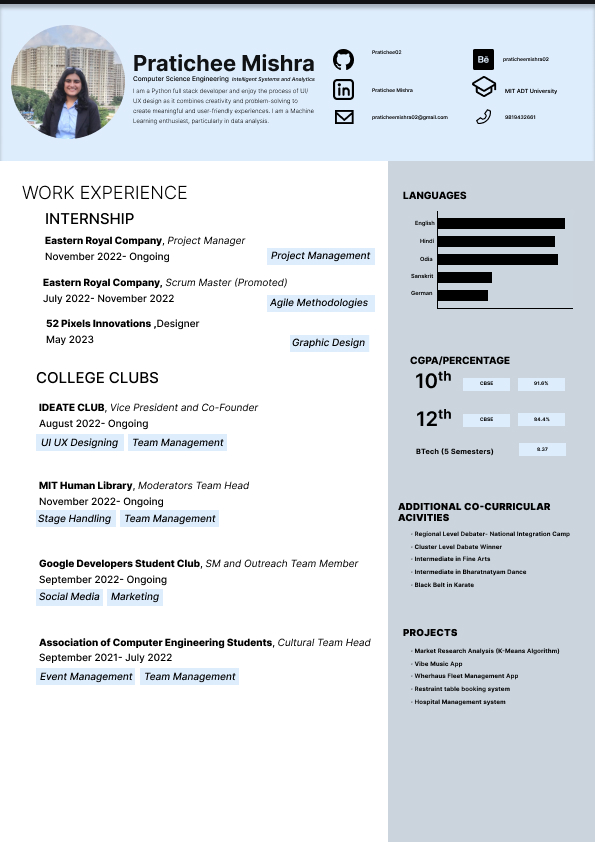

In [7]:
img_pl

### Text from Image

In [8]:
text_cv = pytesseract.image_to_string(img_cv)

In [9]:
print(text_cv)

 

Pratichee Mishra © ~~ ee
ipstreer tee case panera aa (in) ee lee

canine ne of) en

 

 

 

 

 

 

    

WORK EXPERIENCE LANGUAGES

INTERNSHIP om

Eastern Royal Company, Project Manager na

November 2022- ongoing Project Management on

Eastern Royal Company, Scrum Master (Promoted) a

July 2022- November 2022 gis ETTORE) am

52 Pixels innovations Designer

May 2023 ‘Graphic Design

(CPA/PERCENTAGE

COLLEGE CLUBS 40%
IDEATE CLUB, Vice President and Co-Founder ee
‘August 2022- Ongoing

UIUX Designing Team Management money =

(MIT Human Library, Moderators Team Head
November 2022- Ongoing [ADDITIONAL CO-CURRICULAR

‘Stage Handling Team Management ‘ACIVITIES

 

‘Google Developers Student Club, SM and Outreach Tear Member =

‘September 2022- Ongoing ere
Social Media Marketing

‘Association of Computer Engineering Studente, Cultural Team Head
‘September 2021- July 2022
Event Management Team Management

 



In [10]:
text_pl = pytesseract.image_to_string(img_pl)

In [11]:
print(text_pl)

 

 

 

 

 

WORK EXPERIENCE

INTERNSHIP.

Eastern Royal Company, Project Manager

November 2022- Ongoing Project Management
Eastern Royal Company, Scrum Master (Promoted)

July 2022- November 2022 Tee RAISES
52 Pixels innovations ,Oesigner

May 2023 Graphic Design

COLLEGE CLUBS

IDEATE CLUB, Vice President and Co-Founder
‘August 2022- Ongoing
UIUX Designing Team Management

(MIT Human Library, Moderators Team Head
November 2022- Ongoing
‘Stage Handling Team Management

 

Google Developers Student Club, SM and Outreach Team Member
September 2022- Ongoing
Social Media Marketing

‘Association of Computer Engineering Studente, Cultural Team Head
September 2021- July 2022

Event Management Team Management

 

 

Languages
‘COPA/PERCENTAGE

Ogee
q2th on
sren(tteeer)

ADDITIONAL CO-CURRICULAR
‘ACIVITIES

 

PROJECTS

  

 

ann nig ote

 



### Image to Data

In [12]:
data = pytesseract.image_to_data(img_cv)

In [13]:
#data.split('\n')
dataList = list(map(lambda x: x.split('\t'),data.split('\n')))
df = pd.DataFrame(dataList[1:],columns=dataList[0])

In [14]:
df.head(10)

,level,page_num,block_num,par_num,line_num,word_num,left,top,width,height,conf,text
0,1,1,0,0,0,0,0,0,595,842,-1,
1,2,1,1,0,0,0,0,0,595,13,-1,
2,3,1,1,1,0,0,0,0,595,13,-1,
3,4,1,1,1,1,0,0,0,595,13,-1,
4,5,1,1,1,1,1,0,0,595,13,95,
5,2,1,2,0,0,0,133,49,424,48,-1,
6,3,1,2,1,0,0,133,49,424,48,-1,
7,4,1,2,1,1,0,134,49,415,22,-1,
8,5,1,2,1,1,1,134,54,101,17,92,Pratichee
9,5,1,2,1,1,2,243,54,71,17,94,Mishra


In [15]:
df.dropna(inplace=True) # drop the missing in rows
col_int = ['level','page_num','block_num','par_num','line_num','word_num','left','top','width','height','conf']
df[col_int] = df[col_int].astype(int)

In [16]:
df.dtypes

level         int32
page_num      int32
block_num     int32
par_num       int32
line_num      int32
word_num      int32
left          int32
top           int32
width         int32
height        int32
conf          int32
text         object
dtype: object

In [17]:
image = img_cv.copy()
level = 'word'
for l,x,y,w,h,c,txt in df[['level','left','top','width','height','conf','text']].values:
    #print(l,x,y,w,h,c)
    if level == 'page':
        if l == 1:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,0),2)
        else:
            continue
            
    elif level == 'block':
        if l == 2:
            cv2.rectangle(image,(x,y),(x+w,y+h),(255,0,0),2)
        else:
            continue
    
    elif level == 'para':
        if l == 3:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
        else:
            continue
    
    elif level == 'line':
        if l == 4:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,0,255),2)
        else:
            continue
            
    elif level == 'word':
        if l == 5:
            cv2.rectangle(image,(x,y),(x+w,y+h),(0,255,0),2)
            cv2.putText(image,txt,(x,y),cv2.FONT_HERSHEY_PLAIN,1,(255,0,0),2)
        else:
            continue
            
cv2.imshow("bounding box",image)
cv2.waitKey()
cv2.destroyAllWindows()